<table align="center" width=100%>
    <tr>
        <td width="14%">
            <img src="gRAD.png">
        </td>
        <td>
            <div align="center">
                <font color="purple" size=50%>
                    <b>GRADUATE ADMISSION PREDICTION
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

Students are often worried about their chances of admission in graduate school. The aim of this machine learning model is to help students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their admission chances in a particular university. This will assist students to know in advance if they have a chance to get accepted.

## Data Definition

**GRE Score:** Graduate Record Exam (GRE) score. The score will be out of 340 points (numeric)

**TOEFL Score:** Test of English as a Foreigner Language2 (TOEFL) score, which will be out of 120 points (numeric)

**University Rating:** University Rating (Uni.Rating) that indicates the Bachelor University ranking among the other
                       universities. The score will be out of 5 (numeric)

**SOP:** Statement of purpose (SOP) which is a document written to show the candidate's life, ambitious and the motivations for
         the chosen degree/ university. The score will be out of 5 points (numeric)

**LOR:** Letter of Recommendation Strength (LOR) which verifies the candidate professional experience, builds credibility,
         boosts confidence and ensures your competency. The score is out of 5 points (numeric) 

**CGPA:** Undergraduate GPA (CGPA) out of 10 (numeric)

**Research:** Research Experience that can support the application, such as publishing research papers in conferences, working               as research assistant with university professor (either yes or no) (categorical)

**Chance of Admit:** One dependent variable can be predicted which is chance of admission, that is according to the input given                      will be ranging from 0 to 1 (numeric).

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Preprocessing](#data_preparation)**
    - 4.1 - [Data Dimension](#Data_Shape)
    - 4.2 - [Data Types](#Data_Types)
    - 4.3 - [Missing Values](#Missing_Values)
    - 4.4 - [Summary Statistics](#Summary_Statistics)
    - 4.5 - [Analyze Categorical Variables](#categorical)
    - 4.6 - [Discover Outliers](#outliers)
    - 4.7 - [Correlation](#correlation)
    - 4.8 - [Analyze Relationships Between Variables](#categorical_numerical)
    - 4.9 - [Dummy Encoding of Categorical Variables](#dummy)
5. **[Linear Regression (OLS)](#LinearRegression)**
    - 5.1 - [Multiple Linear Regression - Full Model(OLS)](#withLog)
    - 5.2 - [Dealing with Multicollinearity](#multideal)
    - 5.3 - [Linear Regression Using Feature Scaling ](#linearreg)
    - 5.4 - [Check the Assumptions of Linear Regression](#Assumptions)
         - 5.4.1 - [Detecting Autocorrelation](#Autocorrelation)
         - 5.4.2 - [Detecting Heteroskedasticity](#Heteroskedasticity)
         - 5.4.3 - [Linearity of Residuals](#Linearity_of_Residuals)
         - 5.4.4 - [Normality of Residuals](#Normality_of_Residuals)
    - 5.5 - [Linear Regression With Significant Variable (OLS)](#RemovingInsignificantVariable_scaleddata)
    - 5.6 - [Linear Regression Using Backward Elimination](#Interaction)
6. **[Model Performance](#model_perf)**  
7. **[Model Optimization](#model_opt)** 
    - 7.1 - [Model Validation (Cross Validation)](#Model_val)
         - 7.1.1 - [K-Fold Cross Validation](#kfold)
         - 7.1.2 - [Leave One Out Cross Validation (LOOCV)](#LOOCV)
    - 7.2 - [Stochastic Gradient Descent - SGD](#sgd)
    - 7.3   [Regularization (OLS)](#regularization)
         - 7.3.1 - [Ridge Regression Model (OLS)](#Ridge_Regression)
         - 7.3.2 - [Lasso Regression Model (OLS)](#Lasso_Regression)
         - 7.3.3 - [Elastic Net Regression Model (OLS)](#Elastic_Net)
8. **[Conclusion](#rmse_and_r-squared)**    

<a id='import_lib'></a>
## 1. Import Libraries

**Let us import the required libraries and functions**

In [1]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import jarque_bera
from scipy import stats
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

<a id='set_options'></a>
## 2. Set Options

In [2]:
# the path for reading the data file
# Note: Set your path accordingly
#os.chdir('/Users/Dippies/GL DSE Deliveries/Regression/Nov 22')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
## 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get insights from the data<br> 
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
# read csv file using pandas
df_adm = pd.read_csv("admission.csv")


# display the top 5 rows of the dataframe
df_adm.head()

# Note: In order to display more rows, example 10, use head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,yes,0.920000
1,324,107,4,4.000000,4.500000,8.870000,yes,0.760000
2,316,104,3,3.000000,3.500000,8.000000,yes,0.720000
3,322,110,3,3.500000,2.500000,8.670000,yes,0.800000
4,314,103,2,2.000000,3.000000,8.210000,No,0.650000


<a id='data_preparation'></a>
## 4. Data Analysis and Preparation


<table align="left">
    <tr>
        <td width="15%">
            <img src="analysis1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data prior to building predictive models. <br><br>
                        Here we will analyze and prepare data to perform regression analysis:<br>
                        1. Check dimensions of the dataframe in terms of rows and columns <Br>
                        2. Check the data types. Refer data definition to ensure your data types are correct  <br>
                        3. If data types are not as per business context, change the data types as per requirement <br>
                        4. Study summary statistics<br>
                        5. Check for missing values<br>
                        6. Study correlation<br>
                        7. Analyze categorical variables<br>
                        8. Analyze relationship between target variable and categorical variables<br>
                        9. Perform feature engineering<br>
                       10. Detect outliers<br>
                       11. Recheck the correlation<br><br>
                        Note: It is an art to explore data and one will need more and more practice to gain expertise in this area.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Shape'></a>
### 4.1. Data Dimension

To know the dimensions of the data:

In [4]:
# .shape returns the dimension of the data
df_adm.shape

(400, 8)

We see the dataframe has 8 columns and 400 observations.

<a id='Data_Types'></a>
### 4.2 Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="data.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In this section we will: <br>  
                        1. Check data types<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check data types**

In [5]:
# use .dtypes to view the data type of a variable
df_adm.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

<table align='left'>
    <tr>
        <td width='8%'>
            <img src='solution.png'>
        </td>
        <td>
            <div align='left', style='font-size:120%'>
                <font color='#21618C'>
                    <b>From the above output, we see that data types are as per the data definition. Now we can proceed with the analysis.<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>




<a id='Missing_Values'></a>
### 4.3 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="mis.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_adm.isnull().sum().sort_values(ascending=False) 

# 'isnull().sum()' returns the number of missing values in each variable
# 'isnull().count()' returns the count of the data, i.e. count of outcomes 'True' and 'False' of isnull() 
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_adm.isnull().sum()*100/df_adm.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
Chance of Admit,0,0.000000
Research,0,0.000000
CGPA,0,0.000000
LOR,0,0.000000
SOP,0,0.000000
University Rating,0,0.000000
TOEFL Score,0,0.000000
GRE Score,0,0.000000


# Visualize Missing Values using Heatmap

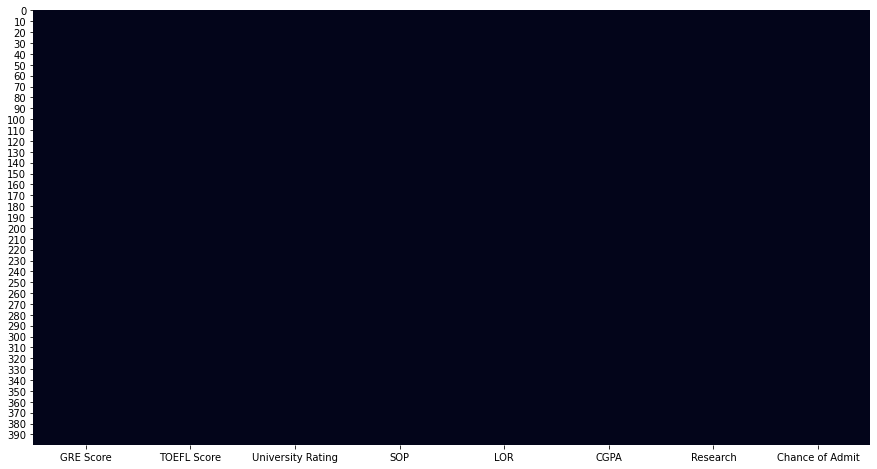

In [7]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df_adm.isnull(), cbar=False)

# display the plot
plt.show()

 We have the dataset with no missing values.

<a id='Summary_Statistics'></a>
### 4.4 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="summ1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset we have numerical and categorical variables. Now we check for summary statistics of all the variables<br>
                        1. For numerical variables, we use .describe()<br>
                        2. For categorical features, we use .describe(include=object) <br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, we use .describe()**

In [8]:
# describe the numerical data
df_adm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,0.970000


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.<br>
    Note, the average GRE Score is 316.8,average TOEFL SCore is 107.4 and average CGPA is 8.59.<br><br>
    If we observe the count of all the variables, there is equal count for all the variables. So we can say that there are no missing values in these variables. </b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical features, we use .describe(include=object)**

In [9]:
# describe the categorical data
# include=object: selects the categorical features
df_adm.describe(include = object)

# Note: If we pass 'include=object' to the .describe(),
# it will return descriptive statistics for categorical variables only

,Research
count,400
unique,2
top,yes
freq,219


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The summary statistics for categorical variables can be interpreted as:<br><br>
       count - Total number of observations<br>
       unique - Number of unique classes in a variable<br>
       top - The most repeated class<br>
       freq - Frequency of most repeated class<br><br>
       </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='categorical'></a>
### 4.5 Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

First let us print the summary statistics of the categorical features.

In [10]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df_adm.describe(include=object)

,Research
count,400
unique,2
top,yes
freq,219


There is a single categorical variables. From the output we see that the variable 'Research' has 2 unique categories. 



<a id='outliers'></a>
### 4.6 Discover Outliers

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

**Recollect that one of the assumptions of Linear Regression is there should be no outliers present in the data**

<table align="left">
    <tr>
        <td width="12%">
            <img src="outlier.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to detect outliers in numerical data, we perform the following:<br>
                    1. Plot boxplot for numerical data<br>
                    2. Note the variables for which outliers are present<br>
                    3. Remove outliers by IQR method<br> 
                    4. Plot boxplot to recheck for outliers</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Plot boxplot for numerical data**

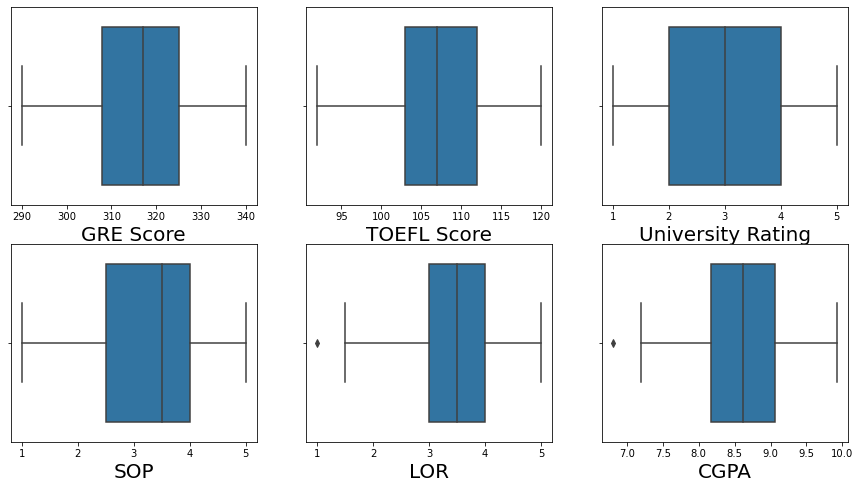

<AxesSubplot:xlabel='Chance of Admit'>

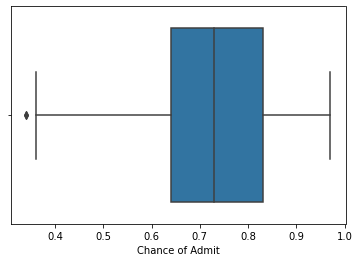

In [11]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
df_numeric_features=df_adm.select_dtypes(np.number)
# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_numeric_features.columns, ax.flatten()):
    z = sns.boxplot(x = df_numeric_features[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)  
plt.show()
sns.boxplot(x=df_numeric_features['Chance of Admit'])

In [12]:
df_numeric_features.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.500000,4.500000,9.650000,0.920000
1,324,107,4,4.000000,4.500000,8.870000,0.760000
2,316,104,3,3.000000,3.500000,8.000000,0.720000
3,322,110,3,3.500000,2.500000,8.670000,0.800000
4,314,103,2,2.000000,3.000000,8.210000,0.650000


**2. Note the variables for which outliers are present**

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variable 'LOR','CGPA' and 'Chance of Admit' have outliers<br>

Let us use the IQR method to remove the outliers</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>



**3. Remove outliers by IQR method**

In [13]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# axis=1: specifies that the labels are dropped from the columns
Q1 = df_numeric_features.quantile(0.25)

# compute the first quartile using quantile(0.75)
# axis=1: specifies that the labels are dropped from the columns
Q3 = df_numeric_features.quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

GRE Score           17.000000
TOEFL Score          9.000000
University Rating    2.000000
SOP                  1.500000
LOR                  1.000000
CGPA                 0.892500
Chance of Admit      0.190000
dtype: float64


In [14]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
df_adm = df_adm[~((df_adm < (Q1 - 1.5 * IQR)) | (df_adm > (Q3 + 1.5 * IQR))).any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed

In [15]:
# check the shape of data using shape
df_adm.shape

(396, 8)

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>So that the above output shows there is a reduction in the number of rows(from 400 to 396). Now, to confirm that the outliers have been removed let us visualize using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Plot boxplot to recheck for outliers**

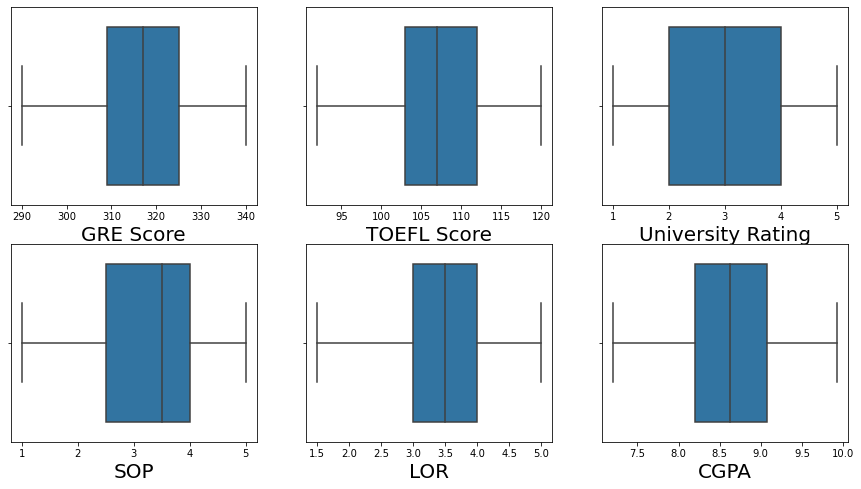

<AxesSubplot:xlabel='Chance of Admit'>

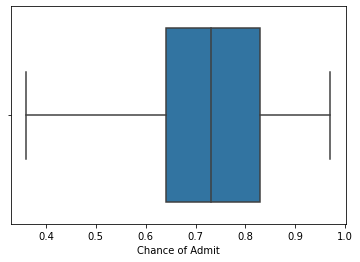

In [16]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))
df_numeric_features=df_adm.select_dtypes(np.number)
# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_numeric_features.columns, ax.flatten()):
    z = sns.boxplot(x = df_numeric_features[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20) 
plt.show()
sns.boxplot(x=df_numeric_features['Chance of Admit'])

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

<a id='correlation'></a>
### 4.7 Correlation

<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

<table align="left">
    <tr>
        <td width="8%">
            <img src="corr1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to compute the correlation matrix, we perform the following:<br>
                    1. Filter out only the numeric variables from the dataframe using select_dtypes() function<br>
                    2. Call the corr() function which will return the correlation matrix of numeric variables <br>
                    3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter out only the numeric variables from the dataframe**

In [17]:
# filter the numerical features in the dataset
# include=np.number: selects the numeric features
df_numeric_features = df_adm.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Chance of Admit'],
      dtype='object')

**2.  Call the corr() function which will return the correlation matrix of numeric variables**

In [18]:
# generate the correlation matrix 
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
GRE Score,1.000000,0.831680,0.662604,0.613904,0.547715,0.831085,0.798145
TOEFL Score,0.831680,1.000000,0.689227,0.657775,0.555149,0.825385,0.785519
University Rating,0.662604,0.689227,1.000000,0.735329,0.652626,0.740944,0.707278
SOP,0.613904,0.657775,0.735329,1.000000,0.726971,0.722563,0.686728
LOR,0.547715,0.555149,0.652626,0.726971,1.000000,0.660154,0.662595
CGPA,0.831085,0.825385,0.740944,0.722563,0.660154,1.000000,0.870913
Chance of Admit,0.798145,0.785519,0.707278,0.686728,0.662595,0.870913,1.000000


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

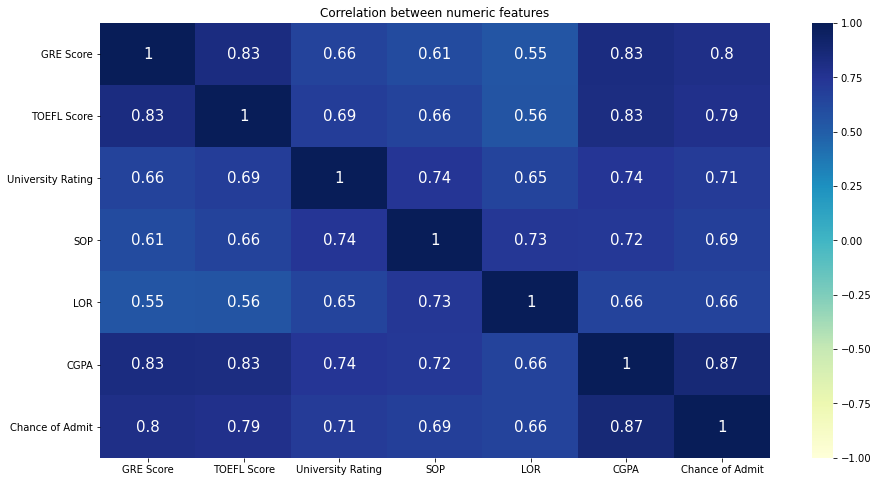

In [19]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu' ,vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15})

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Most of the variables are positively correlated. The target variable.i.e. Chance of Admit have strong correlation with all numeric variables.<br><br>
                       <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="note1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>So, We can expect there may be a strong multicollinearity between the independent variables.</b> <br><br>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='categorical_numerical'></a>
### 4.8 Analyze Relationship Between Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let’s start by creating box-and-whisker plots with seaborn’s boxplot method:
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Analysis of relationship between GRE score and research**

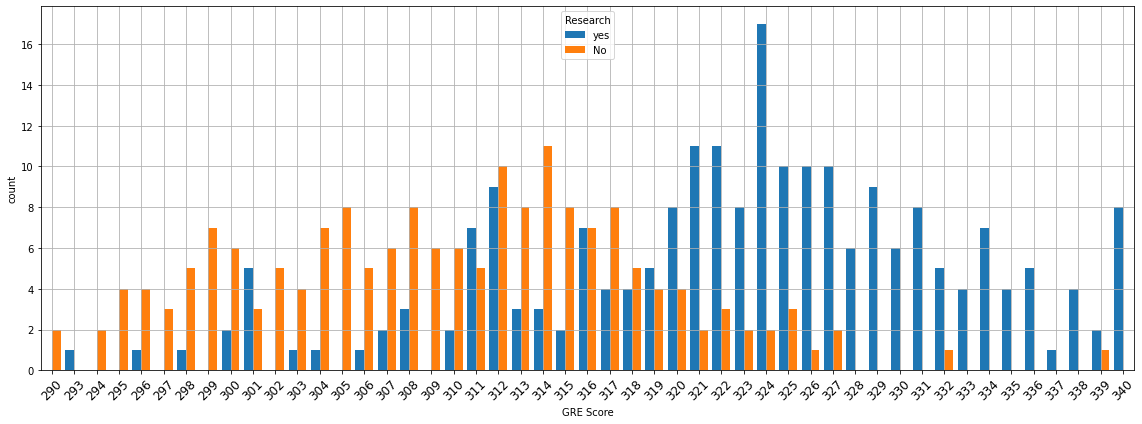

In [20]:
plt.figure(figsize=(16,6))
sns.countplot(data=df_adm,x="GRE Score",saturation=1,hue='Research')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Most of the students who has done research are those with good GRE score.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**Analysis of relationship between TOEFL score and research**

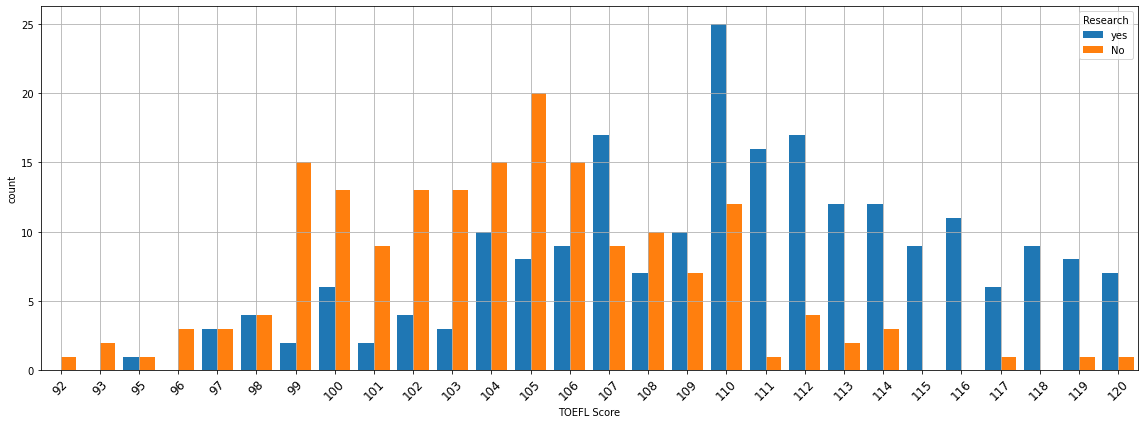

In [21]:
plt.figure(figsize=(16,6))
sns.countplot(data=df_adm,x="TOEFL Score",saturation=1,hue='Research')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Most of the students who has done research are those with good TOEFL score
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Analysis of SOP score based on research**

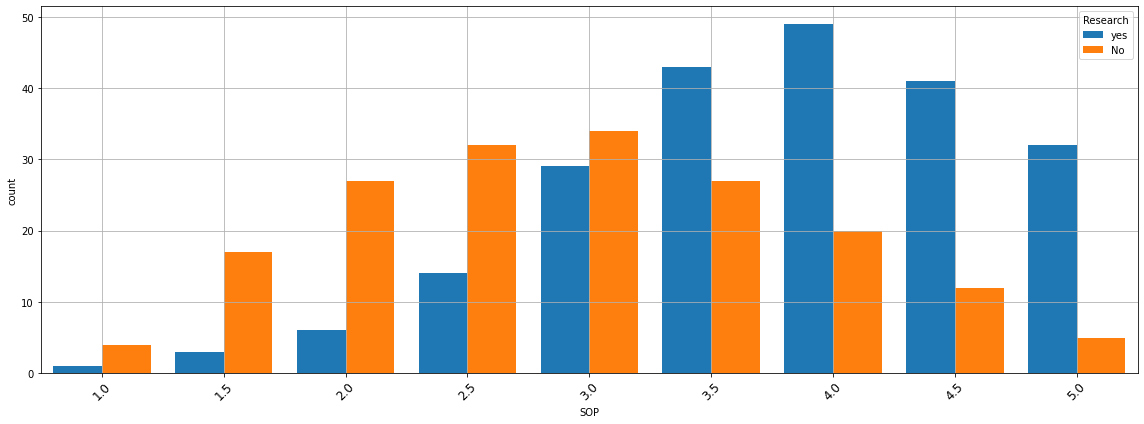

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(data=df_adm,x="SOP",saturation=1,hue='Research')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The students who have done research have good SOP score.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Analysis of LOR score based on research**

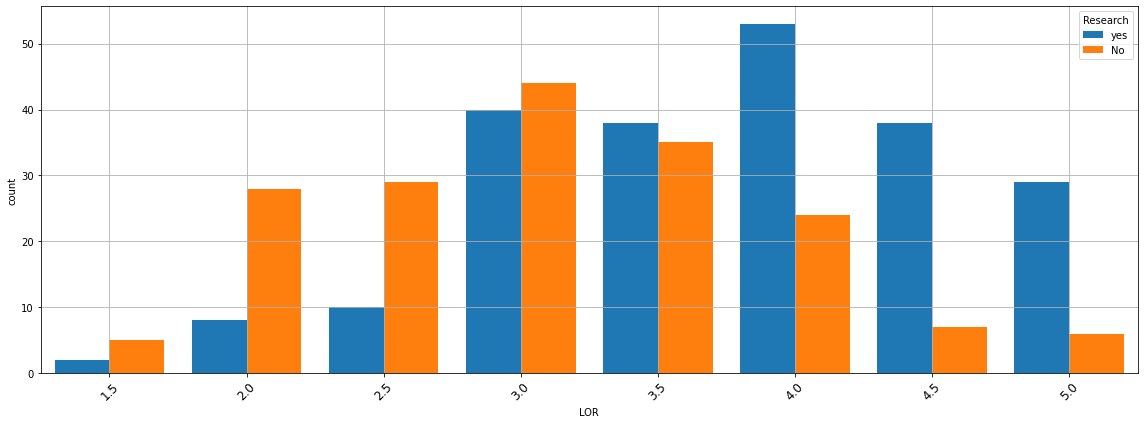

In [23]:
plt.figure(figsize=(16,6))
sns.countplot(data=df_adm,x="LOR",saturation=1,hue='Research')
plt.xticks(rotation=45,size=12)
plt.grid()
plt.tight_layout()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The students who have done research have good LOR score
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**Analyze the relationship between GRE score and Chance of Admit**

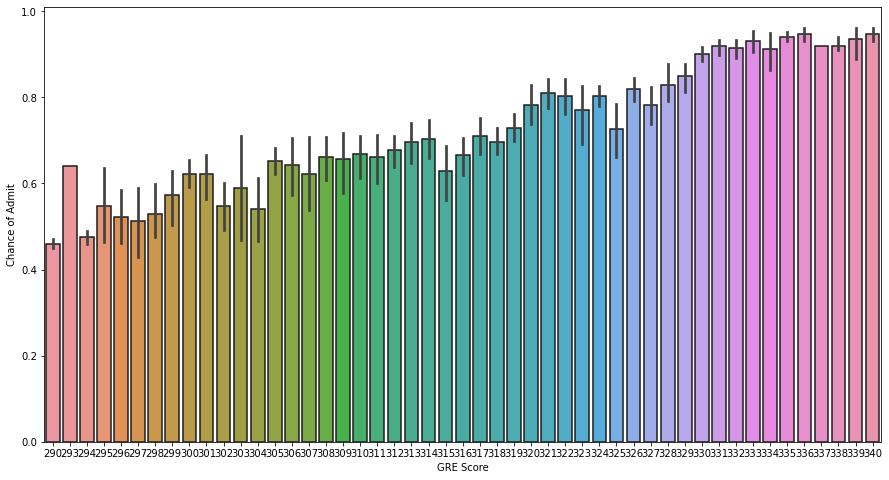

In [24]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='GRE Score',y='Chance of Admit',data=df_adm, linewidth=1.5,edgecolor="0.1")
plt.show()

**Analyze the relationship between TOEFL score and Chance of Admit**

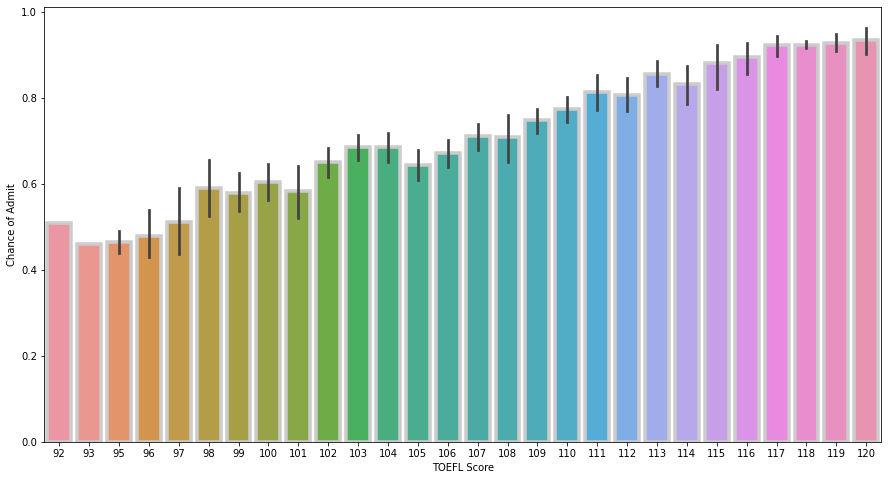

In [25]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(x='TOEFL Score',y='Chance of Admit',data=df_adm, linewidth=3.5,edgecolor="0.8")
plt.show()

The above two graphs make it clear that higher the Scores better the Chance of admit

**Analyze the relationship between University Rating and CGPA**

<AxesSubplot:xlabel='University Rating', ylabel='CGPA'>

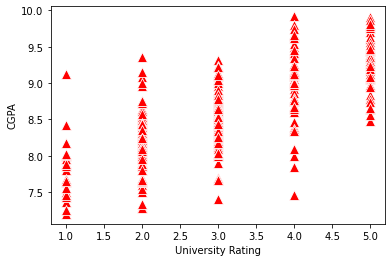

In [26]:
sns.scatterplot(x='University Rating',y='CGPA',data=df_adm,color='Red', marker="^", s=100)

Ratings of university increase with the increase in the CGPA

<a id='dummy'></a>
### 4.9 Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As seen before in section 4.1.2, it is seen that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use label encoding.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We need to perform dummy encoding on our categorical variables before we proceed, since the method of OLS works only on numeric data <br><br>
                    In order to label encode, we do the following: <br>
                    1. Filter numerical and categorical variables<br>
                    2. Dummy encode the catergorical variables<br>
                    3. Concatenate numerical and dummy encoded categorical variables<br></b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter numerical and categorical variables**

In [27]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df_adm.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Chance of Admit'],
      dtype='object')

In [28]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df_adm.select_dtypes(include=[np.object])

# display categorical features
df_categoric_features.columns

Index(['Research'], dtype='object')

**2. Label encode the catergorical variables**

In [29]:
# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

**3. Concatenate numerical and label encoded categorical variables**

In [30]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_adm_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_adm_dummy.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit,Research_yes
0,337,118,4,4.500000,4.500000,9.650000,0.920000,1
1,324,107,4,4.000000,4.500000,8.870000,0.760000,1
2,316,104,3,3.000000,3.500000,8.000000,0.720000,1
3,322,110,3,3.500000,2.500000,8.670000,0.800000,1
4,314,103,2,2.000000,3.000000,8.210000,0.650000,0


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus we have obtained the label coded variables. <br><br>
                        Note: Now the categorical variable is dummy encoded and for each category, a unique number is assigned. 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='withLog'></a>
### 5.1 Multiple Linear Regression - Full Model (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br>
                       1. Split the data into training and test sets<br>
                       2. Build model using sm.OLS().fit()<br>
                       
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Split the data into training and test sets**

In [31]:
# add the intercept column to the dataset
df_adm_dummy = sm.add_constant(df_adm_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = df_adm_dummy.drop(['Chance of Admit'], axis=1)

# extract the target variable from the data set
y = df_adm_dummy['Chance of Admit']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (297, 8)
The shape of X_test is: (99, 8)
The shape of y_train is: (297,)
The shape of y_test is: (99,)


**2. Build model using sm.OLS().fit()**

In [32]:
# build a full model using OLS()
# consider the log of claim 
linreg_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     160.2
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.47e-95
Time:                        19:49:54   Log-Likelihood:                 406.86
No. Observations:                 297   AIC:                            -797.7
Df Residuals:                     289   BIC:                            -768.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.1519      0.13

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 79.5% of the variation in dependent variable Chance of Admit.The Durbin-Watson test statistics is 1.734 and indicates that there is no autocorrelation. The Condition Number 1.26e+04 suggests that there is strong multicollinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="note1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Condition Number : One way to assess multicollinearity is to compute the condition number(CN). If CN is less than 100, there is no multicollinearity. If CN is between 100 and 1000, there is moderate multicollinearity and if CN is greater 1000 there is severe multicollinearity in the data <br><br>
                        Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation      
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='multideal'></a>
### 5.2 Dealing with the multicollinearity

The Variance Inflation Factor (VIF) is used to detect the presence of multicollinearity between the features. The value of VIF equal to 1 indicates that no features are correlated. We calculate VIF of the numerical independent variables.   

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to deal with multicollinearity, we do the following: <br>
                       1. Using Variance inflation Factor<br>
                       2. Feature Scaling<br>
                       
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Using Variance inflation Factor**

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
df_numeric_features.drop(['Chance of Admit'],axis=1,inplace=True)
vif['VIF_Factor']=[variance_inflation_factor(df_numeric_features.values,i) for i in range(df_numeric_features.shape[1])]
vif['Features']=df_numeric_features.columns
vif

,VIF_Factor,Features
0,1460.908976,GRE Score
1,1348.108953,TOEFL Score
2,21.697591,University Rating
3,38.429452,SOP
4,38.653983,LOR
5,1108.351057,CGPA


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The output shows all the variables have the highest VIF.i.e. all Features have VIF_Factor >10.<br><br>
                        But we cannot drop this columns because this are the main attributes to predict the chance of admit         
                </font>
            </div>
        </td>
    </tr>
</table>

**2. Feature Scaling**

check whether all the attributes are normally distributed.

In [34]:
from scipy import stats
for col in df_numeric_features.columns:
    print("Column ", col, " :", stats.shapiro(df_numeric_features[col]))

Column  GRE Score  : ShapiroResult(statistic=0.986950159072876, pvalue=0.001263009151443839)
Column  TOEFL Score  : ShapiroResult(statistic=0.9871339797973633, pvalue=0.0014111213386058807)
Column  University Rating  : ShapiroResult(statistic=0.9053792357444763, pvalue=5.295367077229503e-15)
Column  SOP  : ShapiroResult(statistic=0.9555397629737854, pvalue=1.463602017359733e-09)
Column  LOR  : ShapiroResult(statistic=0.9548683166503906, pvalue=1.1769959451513046e-09)
Column  CGPA  : ShapiroResult(statistic=0.991794764995575, pvalue=0.02764192223548889)


The above result shows that all atributes are not normally distributed

Now, we will do MinMax scaling for our data

In [35]:
from sklearn import preprocessing
mms = preprocessing.MinMaxScaler()
mmsfit = mms.fit(df_numeric_features)
dfxz = pd.DataFrame(mms.fit_transform(df_numeric_features), columns = ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'])
dfxz.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,0.940000,0.928571,0.750000,0.875000,0.857143,0.900735
1,0.680000,0.535714,0.750000,0.750000,0.857143,0.613971
2,0.520000,0.428571,0.500000,0.500000,0.571429,0.294118
3,0.640000,0.642857,0.500000,0.625000,0.285714,0.540441
4,0.480000,0.392857,0.250000,0.250000,0.428571,0.371324


In [36]:
df_categoric_features=df_categoric_features.reset_index()
df_categoric_features.drop(['index'],axis=1,inplace=True)
df_categoric_features.head()

,Research_yes
0,1
1,1
2,1
3,1
4,0


In [37]:
dfxz = pd.concat([dfxz, df_categoric_features], axis = 1)
dfxz.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_yes
0,0.940000,0.928571,0.750000,0.875000,0.857143,0.900735,1
1,0.680000,0.535714,0.750000,0.750000,0.857143,0.613971,1
2,0.520000,0.428571,0.500000,0.500000,0.571429,0.294118,1
3,0.640000,0.642857,0.500000,0.625000,0.285714,0.540441,1
4,0.480000,0.392857,0.250000,0.250000,0.428571,0.371324,0


<a id='linearreg'></a>
### 5.3 Linear Regression using Feature scaling

In [38]:
X=dfxz.copy()
X=sm.add_constant(X)
X.head()

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research_yes
0,1.000000,0.940000,0.928571,0.750000,0.875000,0.857143,0.900735,1
1,1.000000,0.680000,0.535714,0.750000,0.750000,0.857143,0.613971,1
2,1.000000,0.520000,0.428571,0.500000,0.500000,0.571429,0.294118,1
3,1.000000,0.640000,0.642857,0.500000,0.625000,0.285714,0.540441,1
4,1.000000,0.480000,0.392857,0.250000,0.250000,0.428571,0.371324,0


In [39]:
y=y.reset_index()
y.drop(['index'],axis=1,inplace=True)
y.head()

,Chance of Admit
0,0.920000
1,0.760000
2,0.720000
3,0.800000
4,0.650000


In [40]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,random_state=2,test_size=0.3)
mlr_model_scaled=sm.OLS(y_train1,X_train1).fit()
mlr_model_scaled.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     140.0
Date:                Sun, 16 May 2021   Prob (F-statistic):           7.39e-86
Time:                        19:49:56   Log-Likelihood:                 366.42
No. Observations:                 277   AIC:                            -716.8
Df Residuals:                     269   BIC:                            -687.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4002      0.012     33.032      0.000       0.376       0.424
GRE Score             0.0855      0.037      2.290      0.023       0.012       0.159
TOEFL Score           0.0570      0.037      1.539      0.125      -0.016       0.130
University Rating     0.0113      0.022      0.504      0.614      -0.033       0.055
SOP                  -0.0051      0.026     -0.193      0.847      -0.057       0.047
LOR                   0.0724      0.024      3.056      0.002       0.026       0.119
CGPA                  0.3661      0.042      8.793      0.000       0.284       0.448
Research_yes          0.0248      0.010      2.532      0.012       0.006       0.044
==============================================================================
Omnibus:                       58.739   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.109
Skew:                          -1.098   Prob(JB):                     2.75e-25
Kurtosis:                       5.230   Cond. No.                         21.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> This model explains 78.5% of the variation in dependent variable Chance of Admit.The Durbin-Watson test statistics is 2.027 and indicates that there is no autocorrelation. The Condition Number 21.9 suggests that there is no multicollinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Assumptions'></a>
### 5.4 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### 5.4.1 Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows: <br>
        
          H0: There is no autocorrelation in the residuals
          H1: There is autocorrelation in the residuals

**The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation**

**From the summary output in section 5.3, we see that the Durbin-Watson static is  2.027**

**Hence we can conclude that there is no autocorrelation**

<table align="left">
    <tr>
        <td width="8%">
            <img src="note1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We can also find out the p-value associated with the Durbin-Watson statistic from Durbin_Watson table in order to reject or fail to reject the null hypothesis. Reference URL: <a href="https://bit.ly/36DJDR8">Durbin-Watson Table</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Heteroskedasticity'></a>
### 5.4.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [41]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(mlr_model_scaled.resid, mlr_model_scaled.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test) 

[('f-value', 24.80240058486378), ('p-value', 0.0008224854083571362)]

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Linearity_of_Residuals'></a>
### 5.4.3 Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

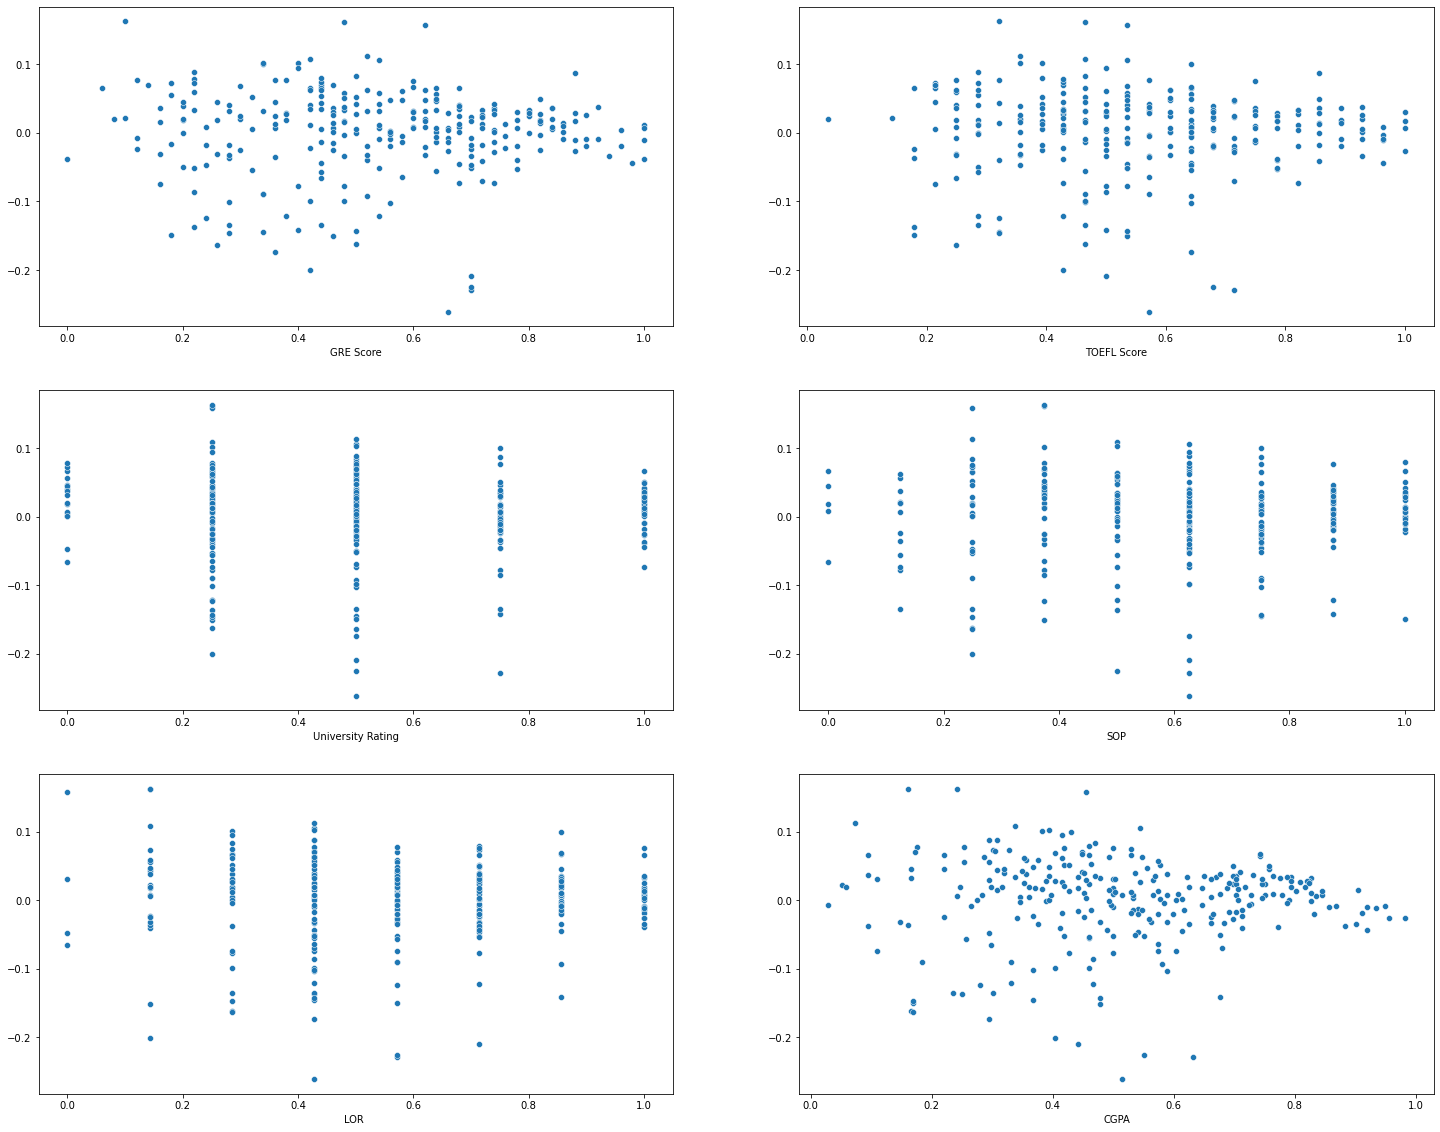

In [42]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 3, ncols= 2, figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train1.columns[1:], ax.flatten()):
    sns.scatterplot(X_train1[variable], mlr_model_scaled.resid , ax=subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Normality_of_Residuals'></a>
### 5.4.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

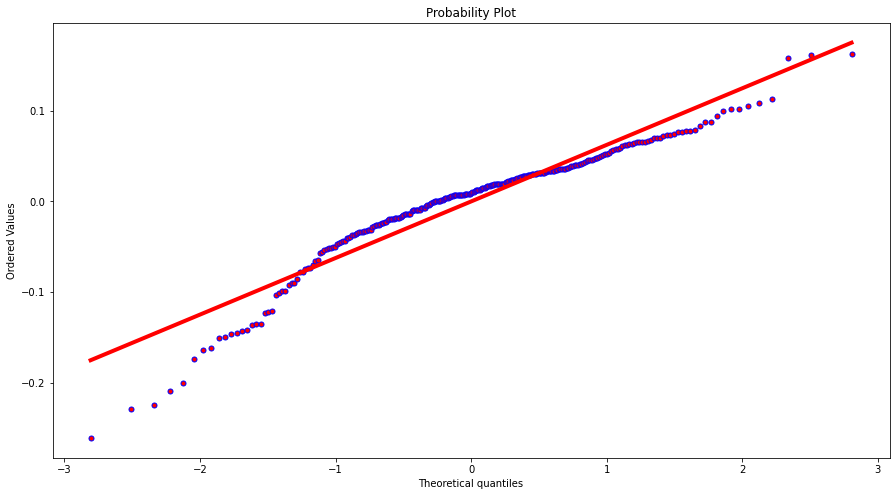

In [43]:
# calculate fitted values
fitted_vals = mlr_model_scaled.predict(X_test1)

# calculate residuals
resids = y_test1 - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot( mlr_model_scaled.resid, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('r')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)** 

In [44]:
# check the mean of the residual
mlr_model_scaled.resid.mean()

1.7695431962888325e-16

The mean of the residuals is very much closer to zero. Therefore, we can say that linearity is present.

**Perform Jarque Bera test to check normality of the residuals**

In [45]:
# normality test using 'jarque_bera'
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(mlr_model_scaled.resid)

# to print the numeric outputs of the Jarque-Bera test upto 3 decimal places
# %.3f: returns the a floating point with 3 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=113.109, p-value=0.000
The data is not normally distributed (reject H0)


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the residuals is not normally distributed.<br><br>
                    </b> </font>
            </div>
        </td>
    </tr>
</table>


<a id='RemovingInsignificantVariable_scaleddata'></a>
### 5.5 Linear Regression with significant Variable (OLS) 

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To build the linear regression model using significant variable, we do the following: <br>
                       1.find insignificant variables from pca model<br> 
                       2. Split the data into training and test sets<br>
                       3. Consider only the significant variables<br>
                       4. Build model using sm.OLS().fit()<br>
                       </b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Find insignifcant variables**

,P-Value
const,0.000000
GRE Score,0.022795
TOEFL Score,0.124941
University Rating,0.614448
SOP,0.847234
LOR,0.002470
CGPA,0.000000
Research_yes,0.011909


In [47]:
# select insignificant variables
insignificant_variables = mlr_model_scaled_pvalues[mlr_model_scaled_pvalues["P-Value"]  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['TOEFL Score', 'University Rating', 'SOP']

**2. Split the data into training and test sets**

In [48]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_scaled is:",X_train2.shape)

# print dimension of predictors test set
print("The shape of X_test_scaled is:",X_test2.shape)

# print dimension of target train set
print("The shape of y_train_scaled is:",y_train2.shape)

# print dimension of target test set
print("The shape of y_test_scaled is:",y_test2.shape)

The shape of X_train_scaled is: (297, 8)
The shape of X_test_scaled is: (99, 8)
The shape of y_train_scaled is: (297, 1)
The shape of y_test_scaled is: (99, 1)


**3. Consider only the significant variables**

In [49]:
# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_train2_significant = X_train2.drop(insigni_var, axis=1)

# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_test2_significant = X_test2.drop(insigni_var, axis=1)

**4. Build model using sm.OLS().fit()**

In [50]:
# ordinary least squares regression
# build a full model with significant scaled variables using OLS()
linreg_model_with_significant_scaled_vars = sm.OLS(y_train2,X_train2_significant).fit()

# to print the summary output
print(linreg_model_with_significant_scaled_vars.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     276.3
Date:                Sun, 16 May 2021   Prob (F-statistic):           6.48e-98
Time:                        19:49:59   Log-Likelihood:                 403.92
No. Observations:                 297   AIC:                            -797.8
Df Residuals:                     292   BIC:                            -779.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4187      0.010     40.478   

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 79.1% of the variation in dependent variable chance of admit.The Durbin-Watson test statistics is  1.766 and indicates that the is no autocorrelation. The Condition Number is 17.6 suggests that there is no collinearity
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Interaction'></a>
### 5.6 Linear Regression using backward elimination


<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the model, we do the following: <br>
                       1. Find out most significant variables using backward elimination<br>
                       2. Split the data into training and test sets<br>
                       3. Build model using sm.OLS().fit()<br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Find out most significant variables using backward elimination**

In [51]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr_b=sfs(estimator=lr,k_features='best',forward=False,verbose=0,scoring='r2')
sfs_backforward=lr_b.fit(X,y)
sfs_backforward.k_feature_names_

('const', 'TOEFL Score', 'LOR ', 'CGPA', 'Research_yes')

In [52]:
sfs_backforward.k_score_

0.7819981528813081

**2. Split the data into training and test sets**

In [53]:
new_x=X[['const', 'TOEFL Score', 'LOR ', 'CGPA', 'Research_yes']]

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train3, X_test3, y_train3, y_test3 = train_test_split(new_x, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train3.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test3.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train3.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test3.shape)

The shape of X_train is: (297, 5)
The shape of X_test is: (99, 5)
The shape of y_train is: (297, 1)
The shape of y_test is: (99, 1)


**3. Build model using sm.OLS().fit()**

In [54]:
# ordinary least squares regression
# build a full model with significant scaled variables using OLS()
linreg_model_backforward = sm.OLS(y_train3,X_train3).fit()

# to print the summary output
print(linreg_model_backforward.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     274.6
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.32e-97
Time:                        19:50:01   Log-Likelihood:                 403.20
No. Observations:                 297   AIC:                            -796.4
Df Residuals:                     292   BIC:                            -777.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4133      0.011     38.055   

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 79% of the variation in dependent variable chance of admit.The Durbin-Watson test statistics is 1.777 and indicates that the is no autocorrelation. The Condition Number is 17.9 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='model_perf'></a>
## 6. Model Performance

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to check the model performance, we do the following: <br>
                       1. Create a generalized function to calculate the RMSE for train and test set.<br>
                       2. Create a generalized function to calculate the R-Squared and Adjusted R- Squared<br>
                       3. Create a generalized function to create a dataframe containing the scores from all the models<br>
                      
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Create a generalized function to calculate the RMSE for train and test set.**

In [55]:
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model,X_train,y_train):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [56]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model,X_test,y_test):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

**2.Create a generalized function to calculate the R-Squared and Adjusted R- Squared**

In [57]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model,X_train,y_train):
    
    # score() returns the R-squared value
    r_sq = model.rsquared
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = X_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = X_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

**3. Create a generalized function to create a dataframe containing the scores from all the models**

In [58]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train_RMSE','Test_RMSE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model,xtrain,xtest,ytrain,ytest, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio,
                       'Train_RMSE':get_train_rmse(model,xtrain,ytrain), 
                       'Test_RMSE': get_test_rmse(model,xtest,ytest), 
                       'R-Squared': get_score(model,xtrain,ytrain)[0], 
                       'Adj. R-Squared': get_score(model,xtrain,ytrain)[1]}, ignore_index = True)

In [91]:
def update_score_card1(algorithm_name, model,xtrain,xtest,ytrain,ytest, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card
    linreg_with_SGD_predictions=linreg_with_SGD.predict(xtest)
    linreg_SGD_r_squared=r2_score(ytest, linreg_with_SGD_predictions)
    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio,
                       'Test_RMSE': get_test_rmse(model,xtest,ytest), 
                       'Train_RMSE':get_train_rmse(model,xtrain,ytrain), 
                       'R-Squared': r2_score(ytest, linreg_with_SGD_predictions), 
                       'Adj. R-Squared': 1 - (1-linreg_SGD_r_squared)*(len(ytest)-1)/(len(ytest)- xtest.shape[1]-1)}, ignore_index = True)

In [60]:
print('Linear Regression model using Feature Scaling ')
# print training RMSE
print('RMSE on train set: ', get_train_rmse(mlr_model_scaled,X_train1,y_train1))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(mlr_model_scaled,X_test1,y_test1))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(mlr_model_scaled,X_train1,y_train1) - get_train_rmse(mlr_model_scaled,X_test1,y_test1))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

Linear Regression model using Feature Scaling 
RMSE on train set:  0.0645
RMSE on test set:  0.0569
Difference between RMSE on train and test set:  0.007600000000000003


In [61]:
# update the dataframe 'score_card'
update_score_card('Linear Regression using Feature Scaling',mlr_model_scaled,X_train1,X_test1,y_train1,y_test1)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900


In [62]:
print('Linear Regression model with significant variables')
# print training RMSE
print('RMSE on train set: ', get_train_rmse(linreg_model_with_significant_scaled_vars,X_train2_significant,y_train2))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(linreg_model_with_significant_scaled_vars,X_test2_significant,y_test2))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(linreg_model_with_significant_scaled_vars,X_train2_significant,y_train2) - get_train_rmse(linreg_model_with_significant_scaled_vars,X_test2_significant,y_test2))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

Linear Regression model with significant variables
RMSE on train set:  0.0621
RMSE on test set:  0.0645
Difference between RMSE on train and test set:  0.0023999999999999994


In [63]:
# update the dataframe 'score_card'
update_score_card('Linear Regression with significant variables',linreg_model_with_significant_scaled_vars,X_train2_significant,X_test2_significant,y_train2,y_test2)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900
1,Linear Regression with significant variables,-,-,0.790988,0.787397,0.062100,0.064500


In [64]:
print('Linear Regression model using backward elimination')
# print training RMSE
print('RMSE on train set: ', get_train_rmse(linreg_model_backforward,X_train3,y_train3))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(linreg_model_backforward,X_test3,y_test3))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(linreg_model_backforward,X_train3,y_train3) - get_train_rmse(linreg_model_backforward,X_test3,y_test3))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

Linear Regression model using backward elimination
RMSE on train set:  0.0623
RMSE on test set:  0.0643
Difference between RMSE on train and test set:  0.001999999999999995


In [65]:
# update the dataframe 'score_card'
update_score_card('Linear Regression using backward elimination',linreg_model_backforward,X_train3,X_test3,y_train3,y_test3)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900
1,Linear Regression with significant variables,-,-,0.790988,0.787397,0.062100,0.064500
2,Linear Regression using backward elimination,-,-,0.789969,0.786360,0.062300,0.064300


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Linear regression model using Feature Scaling is too simple.<br>
                        Linear regression with significant variables and model using backward elimination are too complex.<br>
                        But Linear regression model using backward elimination have less complexity compared to Linear regression model with significant variables. <br>
                        
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='model_opt'></a>
## 7. Model Optimization 

<a id='Model_val'></a>
## 7.1 Model Validation(Cross Validation)


<a id="kfold"></a>
### 7.1.1 K-Fold Cross Validation
K-Fold cross validation is where a given dataset is divided into `K` folds where at some stage each fold is used as a test set.

In [66]:
# n_splits: specify the number of k folds
kf = KFold(n_splits = 5)

# create a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                                   # fit the model
    return model.score(X_test_k, y_test_k)                            # return the R-squared value

In [67]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [68]:
# create an empty list to store the scores
scores = []

# kf.split() splits the indices of X_train into train_index and test_index
# further dividing the X_train and y_train sets into train and test sets for cross validation
# Remember: Cross validation works on training set not on test set
# use '\' for stacking the code 
for train_index, test_index in kf.split(X_train):
    X_train_k, X_test_k, y_train_k, y_test_k = X_train.iloc[train_index], X_train.iloc[test_index], y_train.iloc[train_index], y_train.iloc[test_index]
   
    # call the function 'get_scores()' and append the scores in the list 'scores'
    scores.append(Get_score(LinearRegression(), X_train_k, X_test_k, y_train_k, y_test_k)) 
    
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.7918631884878431, 0.674328509106053, 0.7478345373369253, 0.8307043591369689, 0.7852802526744267]

Minimum score obtained:  0.6743
Maximum score obtained:  0.8307
Average score obtained:  0.766


### K-Fold Cross Validation using `cross_val_score()`

`cross_val_score()` also does the stratified sampling internally if required

In [69]:
# using cross_val_score() for k-fold cross validation
# estimator: pass the machine learning function. Here we are performing linear regression
# pass the X_train and y_train sets
# cv: stands for number of folds. Similar to k in KFold
# scoring: pass the scoring parameter e.g. 'r2' for r-squared, 'neg_mean_squared_error' for mean squared error (negative)
scores = cross_val_score(estimator = LinearRegression(), 
                         X = X_train, 
                         y = y_train, 
                         cv = 5, 
                         scoring = 'r2')

In [70]:
# print all scores
print('All scores: ', scores)

# print the minimum score from the list
# use 'round()' to round-off the minimum score upto 4 digits
# min() returns minimum score 
print("\nMinimum score obtained: ", round(min(scores), 4))

# print the maximum score from the list
# use 'round()' to round-off the maximum score upto 4 digits
# max() returns maximum score 
print("Maximum score obtained: ", round(max(scores), 4))

# print the average score from the list
# use 'round()' to round-off the average score upto 4 digits
# np.mean() returns average score 
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [0.79186319 0.67432851 0.74783454 0.83070436 0.78528025]

Minimum score obtained:  0.6743
Maximum score obtained:  0.8307
Average score obtained:  0.766


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Rsquare values for each fold are not that far away from each other so the model is able to generalize well<br>
                        
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id="loocv"></a>
### 7.1.2 Leave One Out Cross Validation (LOOCV)
It is a process in which the model is trained on the training dataset, with the exception of only one data point, which is used to test the model. This method increases the variance, as only one data point is used for testing. LOOCV can be time consuming as k is equal to the number of observations.

In LOOCV, the estimates from each fold are highly correlated and their average can have a high level of variance.

In [71]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [72]:
# creating a function 'get_score' that returns the R-squared score for the training set
# 'get_score' takes 5 input parameters
def Get_score(model, X_train_k, X_test_k, y_train_k, y_test_k):
    model.fit(X_train_k, y_train_k)                               # fit the model
    return model.score(X_test_k, y_test_k)                        # return the R-squared value

In [73]:
# create an empty to store the MSE for each model
loocv_rmse = []

# instantiate the LOOCV method 
loocv = LeaveOneOut()

# use the for loop to build the regression model for each cross validation 
# use split() to split the dataset into two subsets; one with (n-1) data points and another with 1 data point
# where, n = total number of observations

for train_index, test_index in loocv.split(X_train):
    # create the train dataset, use iloc[] to retrieve the corresponding observations in train data
    # create the test dataset, use iloc[] to retrieve the corresponding observations in test data
    # # use '\' for stacking the code 
    X_train_l, X_test_l, y_train_l, y_test_l = X_train.iloc[train_index], X_train.iloc[test_index], \
                                               y_train.iloc[train_index], y_train.iloc[test_index]
    
    # instantiate the regression model
    linreg = LinearRegression()
    
    # fit the model on training dataset
    linreg.fit(X_train_l, y_train_l)
    
    # calculate MSE using test dataset
    # use predict() to predict the values of target variable
    mse = mean_squared_error(y_test_l, linreg.predict(X_test_l))
    
    # calculate the RMSE
    rmse = np.sqrt(mse)
    
    # use append() to add each RMSE to the list 'loocv_rmse'
    loocv_rmse.append(rmse)

In [74]:
# print the minimum rmse from the list
# use 'round()' to round-off the minimum rmse upto 4 digits
# min() returns minimum rmse 
print("\nMinimum rmse obtained: ", round(min(loocv_rmse), 4))

# print the maximum rmse from the list
# use 'round()' to round-off the maximum rmse upto 4 digits
# max() returns maximum rmse 
print("Maximum rmse obtained: ", round(max(loocv_rmse), 4))

# print the average rmse from the list
# use 'round()' to round-off the average rmse upto 4 digits
# np.mean() returns average rmse 
print("Average rmse obtained: ", round(np.mean(loocv_rmse), 4))


Minimum rmse obtained:  0.0001
Maximum rmse obtained:  0.2718
Average rmse obtained:  0.045


<a id="sgd"></a>
### 7.2 Stochastic Gradient Descent - SGD

The gradient descent method considers all the data points to calculate the values of the parameters at each step. For a very large dataset, this method becomes computationally expensive. To avoid this problem, we use Stochastic Gradient Descent (SGD) which considers a single data point (sample) to perform each iteration. Each sample is randomly selected for performing the iteration.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform Stochastic Gradient Descent. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to perform Stochastic Gradient Descent, we do the following:<br>
                        1. Fit the linear regression using the SGD <br>
                        2. Create a generalized function to plot a barchart for the coefficients <br>
                        3. Adding to Result table<br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1.Fit the linear regression using the SGD**

In [75]:
# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor
# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(X_train3, y_train3)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD,X_train3,y_train3))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD,X_test3,y_test3))

RMSE on train set: 0.0721
RMSE on test set: 0.0703


In [76]:
# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(linreg_with_SGD,X_train3,y_train3) - get_train_rmse(linreg_with_SGD,X_test3,y_test3))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

Difference between RMSE on train and test set:  0.001799999999999996


**2. Create a generalized function to plot a barchart for the coefficients**

In [82]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X_train3.columns, 'Coefficient': model.params})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [83]:
def plot_coefficients1(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X_train3.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

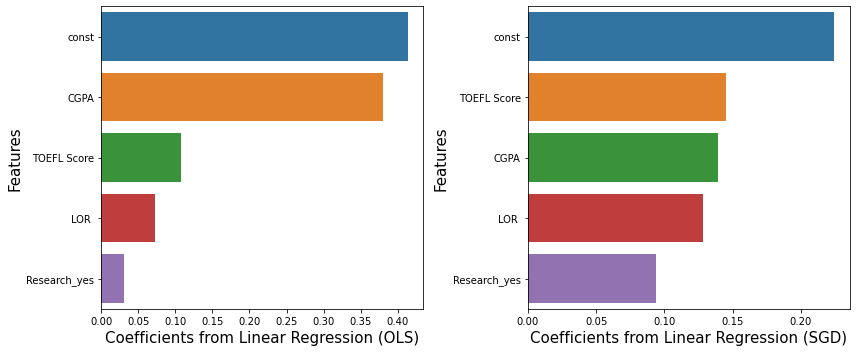

In [87]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_coefficients(linreg_model_backforward, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients1(linreg_with_SGD, 'Linear Regression (SGD)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Coefficients in SGD linear regression model have been decreased.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**3.Adding to Result table**

In [93]:
# update the dataframe 'score_card'
update_score_card1('Linear Regression (using SGD)',linreg_with_SGD,X_train3,X_test3,y_train3,y_test3)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900
1,Linear Regression with significant variables,-,-,0.790988,0.787397,0.062100,0.064500
2,Linear Regression using backward elimination,-,-,0.789969,0.786360,0.062300,0.064300
3,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
4,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> R_squared value is increased. Difference of RMSE is greater compare to linear regression model using backward elimination.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='regularization'></a>
### 7.3  Regularization (OLS)

Overfitting occurs when an algorithm fits the data too well.  Specifically, overfitting occurs if the algorithm shows low bias but high variance.  It is often a result of an excessively complicated model. This can be prevented by fitting multiple models and using cross-validation to compare their predictive accuracies on test data.

Underfitting occurs when an algorithm cannot capture the underlying trend of the data. Intuitively, it occurs when the algorithm does not fit the data well enough. Specifically, it occurs if the model or algorithm shows low variance but high bias. It is often a result of an excessively simple model

One of the challenge in machine learning is that our algorithm must perform well on new, previously unseen data - not just those on which our model was trained. This ability to perform well on previously unobserved data is called generalization. Generalization error is defined as the expected value of the error on a new data. Regularization is any modification we make to a learning algorithm that is intended to reduce it generalization error but not its training error. (Ref. Deep Learning by Ian Goodfellow, Yoshua Bengio, Aaron Courville)

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we will perform regularization to check whether this technique performs better than our linear regression models without regularization</b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Ridge_Regression'></a>
### 7.3.1 Ridge Regression (OLS)

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform ridge regression. We start with our original data set gradually proceeding with our analysis<br><br>
                        In order to perform ridge regression, we do the following:<br>
                        1. Split the data in the form of train and test sets <br>
                        2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics<br>
                        3. Find the alpha for which RMSE is minimum<br>
                        4. Fit a ridge model by substituting the alpha value obtained in step 3<br>
                        5. Compute accuracy measures <br>
                        6. Graph Representation <br>
                        7. Tabulate the results <br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Split the data in the form of train and test sets**

We shall use the scaled data. The train test split is alread conducted for the scaled data.

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

We first create a list of all the variable names and accuracy metrics whose values we want.

In [94]:
# compile the column names of the output dataframe
# add the names of metrics used for comparing the models
# these metrics are used for both lasso and ridge regression

# create list of variable names
col = list(X_train3.columns)

# add 'Sum of square of Residuals' to the list
col.append('ssr')

# add 'R squared' to the list
col.append('R squared')

# add 'Adj. R squared' to the list
col.append('Adj. R squared')

# add 'Root mean Squared Error' to the list
col.append('RMSE')

Fit a linear regression model by the OLS method.

In [95]:
# build a OLS model using OLS()
ridge_regression = sm.OLS(y_train3, X_train3)

# the fitted ridge model
results_fu = ridge_regression.fit()

In a for loop we pass different values of alpha. We tabulate all beta coeffients.

In [96]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.1001, 0.2001, 0.3001, 0.4001, 0.5001 and 10.0001
for n in np.arange(0.0001,10.1, 0.1).tolist():
    
    # fit a rigde regression to the linear model built using OLS
    # L1_wt=0: conducts ridge regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)
    
    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression, 
                                             params=results_fr.params, 
                                             normalized_cov_params=ridge_regression.normalized_cov_params)
    
    # compute the rmse
    # calling the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test3)
    
    # obtain the rmse
    mse_test=round(mean_squared_error(y_test3,results_fr_fit_predictions),4)
    results_fr_fit_rmse=round(np.sqrt(mse_test),4)    
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe.
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe  
df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()

# add the first column name alpha to the data frame. 
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display the output
df_params.head()

,const,TOEFL Score,LOR,CGPA,Research_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,
0.000100,0.413175,0.109165,0.073782,0.378080,0.030667,1.151118,0.789964,0.787087,0.064000
0.100100,0.356335,0.183848,0.161687,0.183754,0.086330,1.843644,0.663605,0.658997,0.078100
0.200100,0.327344,0.174482,0.163371,0.168498,0.106650,2.893776,0.471995,0.464762,0.098500
0.300100,0.306766,0.166559,0.159848,0.159230,0.115976,4.209726,0.231884,0.221362,0.119200
0.400100,0.290462,0.159637,0.155242,0.151936,0.120203,5.734113,-0.046259,-0.060591,0.139300


Let us compare the results for low and high values of alpha

In [97]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,TOEFL Score,LOR,CGPA,Research_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,
0.000100,0.413175,0.109165,0.073782,0.378080,0.030667,1.151118,0.789964,0.787087,0.064000
0.100100,0.356335,0.183848,0.161687,0.183754,0.086330,1.843644,0.663605,0.658997,0.078100
9.900100,0.059809,0.034806,0.035298,0.032860,0.035453,107.762189,-18.662521,-18.931871,0.605000
10.000100,0.059321,0.034523,0.035012,0.032593,0.035171,108.161960,-18.735464,-19.005813,0.606100


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The sum of squares of residual, increases with increase in alpha, this reduces model complexity.
Compare the coefficients in the first and second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares.<br><br>
                      
                   
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**3. Find the alpha for which RMSE is minimum**

Now, to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [98]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


Thus, we may say the model obtained by alpha = 0.0001 is performing the best since has the lowest root mean squared error.

**In ridge regression, coefficients may tend to zero yet are never zero. This can be checked by the follwing code**

In [99]:
# check for zeros in the above coefficients table
# axis=1: specifies that the apply() is to be applies column wise
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     0
0.100100     0
0.200100     0
0.300100     0
0.400100     0
0.500100     0
0.600100     0
0.700100     0
0.800100     0
0.900100     0
1.000100     0
1.100100     0
1.200100     0
1.300100     0
1.400100     0
1.500100     0
1.600100     0
1.700100     0
1.800100     0
1.900100     0
2.000100     0
2.100100     0
2.200100     0
2.300100     0
2.400100     0
2.500100     0
2.600100     0
2.700100     0
2.800100     0
2.900100     0
3.000100     0
3.100100     0
3.200100     0
3.300100     0
3.400100     0
3.500100     0
3.600100     0
3.700100     0
3.800100     0
3.900100     0
4.000100     0
4.100100     0
4.200100     0
4.300100     0
4.400100     0
4.500100     0
4.600100     0
4.700100     0
4.800100     0
4.900100     0
5.000100     0
5.100100     0
5.200100     0
5.300100     0
5.400100     0
5.500100     0
5.600100     0
5.700100     0
5.800100     0
5.900100     0
6.000100     0
6.100100     0
6.200100     0
6.300100     0
6.400100     0
6.500100     0
6.6

For all alpha values, the corresponding value is zero which impiles there are **no** coefficients with value zero.

**4. Fit a ridge model by substituting the alpha value obtained in step 3**

We know that when aplha = 0.0001, the model performs better than other since it has the lowest RMSE and highest adjusted R- squared value. Let us now find its summary output.

In [100]:
# build a ridge model for the desired alpha 
# L1_wt=0: conducts ridge regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)

# fit the model 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression, 
                                        params=results_fr.params, 
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

# print the summary output 
print (ridge_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     274.6
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.32e-97
Time:                        19:59:11   Log-Likelihood:                 403.20
No. Observations:                 297   AIC:                            -796.4
Df Residuals:                     292   BIC:                            -777.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4132      0.011     38.039   

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 79% of the variation in dependent variable chance of admission. The Durbin-Watson test statistics is  1.778 which indicates that there is no autocorrelation. The Condition Number is 17.9 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [101]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(ridge_regression_best,X_train3,y_train3))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(ridge_regression_best,X_test3,y_test3))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(ridge_regression_best,X_train3,y_train3) - get_train_rmse(ridge_regression_best,X_test3,y_test3))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0623
RMSE on test set:  0.0642
Difference between RMSE on train and test set:  0.001899999999999992


**6. Graph representation**

In [102]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X_train3.columns, 'Coefficient': model.params})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

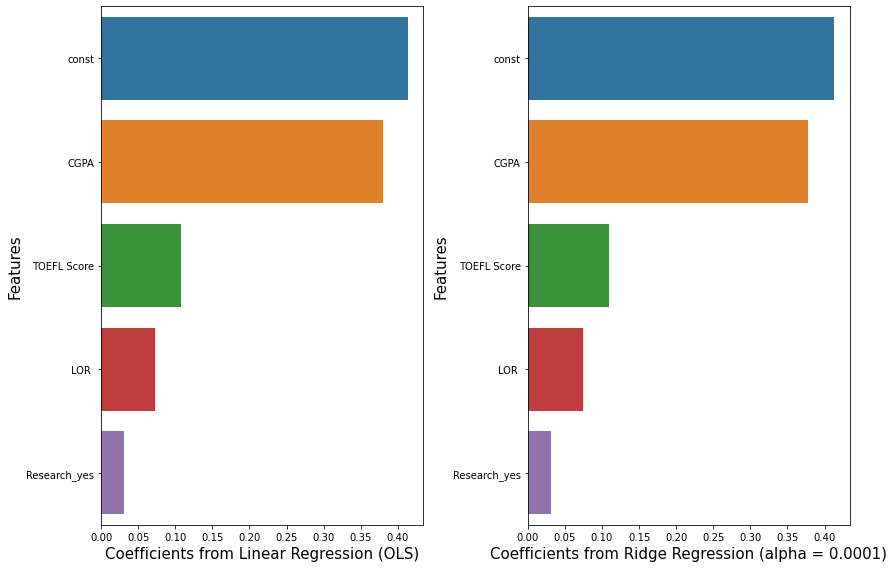

In [103]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plot_coefficients(linreg_model_backforward, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(ridge_regression_best, 'Ridge Regression (alpha = 0.0001)')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**7 Tabulate the results**

In [104]:
# update the dataframe 'score_card'
update_score_card(xtrain=X_train3,ytrain=y_train3,xtest=X_test3,ytest=y_test3,algorithm_name = 'Ridge Regression', model = ridge_regression_best, alpha = '0.0001', l1_ratio = '0')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900
1,Linear Regression with significant variables,-,-,0.790988,0.787397,0.062100,0.064500
2,Linear Regression using backward elimination,-,-,0.789969,0.786360,0.062300,0.064300
3,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
4,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
5,Ridge Regression,0.0001,0,0.789964,0.786356,0.062300,0.064200


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that R-squared and Adjusted R-squared values have decreased and there is no change in RMSE value.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Ridge_Regression'></a>
### 7.3.2 Lasso Regression (OLS)
Lasso regression shrinks the less important variable's coefficient to zero. Thus, removing some variables completely. So, this works well for feature selection in case we have a large number of features.
For lasso regression, we follow a very similar process to ridge regression.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform lasso regression. We start with our original data set and gradually proceeding with our analysis<br><br>
                        In order to perform lasso regression, we do the following:<br>
                        1. Fit a regression model using OLS method <br>
                        2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics<br>
                        3. Find the alpha for which RMSE is minimum<br>
                        4. Fit a lasso model by substituting the alpha value obtained in step 3<br>
                        5. Compute accuracy measures <br>
                        6. Graph Representation <br>
                        7. Tabulate the results <br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Fit a regression model using OLS method**

In [105]:
# we use the scaled data
# build a OLS model using OLS()
lasso_regression = sm.OLS(y_train3, X_train3)

# the fitted lasso model
results_fu = lasso_regression.fit()

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics**

In [106]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be  0.0001, 0.0002 ,0.0003, 0.0004 ,0.0005 to 0.0199
for n in np.arange(0.0001, 0.02, 0.0001).tolist():
    
    # fit a lasso regression to the linear model built using OLS
    # L1_wt=1: conducts lasso regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)
     
    # fit the model 
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                                params=results_fr.params, 
                                                normalized_cov_params=lasso_regression.normalized_cov_params)
    
    # calculate the rmse
    # predict the claim on test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test3)
    
    # obtain the rmse
    # obtain the rmse
    mse_test=round(mean_squared_error(y_test3,results_fr_fit_predictions),4)
    results_fr_fit_rmse=round(np.sqrt(mse_test),4)  
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # convert the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 0.02, 0.0001).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params.head()

,const,TOEFL Score,LOR,CGPA,Research_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,
0.000100,0.413926,0.106949,0.072874,0.379962,0.030588,1.151116,0.789965,0.787088,0.064000
0.000200,0.414505,0.106454,0.072651,0.379335,0.030671,1.151179,0.789953,0.787076,0.064000
0.000300,0.415083,0.105959,0.072428,0.378708,0.030755,1.151284,0.789934,0.787057,0.064000
0.000400,0.415662,0.105464,0.072206,0.378081,0.030838,1.151430,0.789908,0.787030,0.064000
0.000500,0.416241,0.104969,0.071983,0.377454,0.030922,1.151618,0.789873,0.786995,0.064000


Let us compare the results for low and high values of alpha

In [107]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,TOEFL Score,LOR,CGPA,Research_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,
0.000100,0.413926,0.106949,0.072874,0.379962,0.030588,1.151116,0.789965,0.787088,0.064000
0.000200,0.414505,0.106454,0.072651,0.379335,0.030671,1.151179,0.789953,0.787076,0.064000
0.019800,0.525488,0.000000,0.042157,0.256987,0.046613,1.954845,0.643315,0.638429,0.084300
0.019900,0.525984,0.000000,0.041994,0.255933,0.046687,1.962499,0.641918,0.637013,0.084900


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first to the second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares<br><br>
                                         
</b>
                </font>
            </div>
        </td>
    </tr>
</table>






**3. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error

In [108]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


We may say the model obtained by alpha = 0.0001 is performing the best.

**In lasso regression, coefficients may be zero. This can be checked by the following code**

In [109]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)#.head()

alpha*
0.000100    0
0.000200    0
0.000300    0
0.000400    0
0.000500    0
0.000600    0
0.000700    0
0.000800    0
0.000900    0
0.001000    0
0.001100    0
0.001200    0
0.001300    0
0.001400    0
0.001500    0
0.001600    0
0.001700    0
0.001800    0
0.001900    0
0.002000    0
0.002100    0
0.002200    0
0.002300    0
0.002400    0
0.002500    0
0.002600    0
0.002700    0
0.002800    0
0.002900    0
0.003000    0
0.003100    0
0.003200    0
0.003300    0
0.003400    0
0.003500    0
0.003600    0
0.003700    0
0.003800    0
0.003900    0
0.004000    0
0.004100    0
0.004200    0
0.004300    0
0.004400    0
0.004500    0
0.004600    0
0.004700    0
0.004800    0
0.004900    0
0.005000    0
0.005100    0
0.005200    0
0.005300    0
0.005400    0
0.005500    0
0.005600    0
0.005700    0
0.005800    0
0.005900    0
0.006000    0
0.006100    0
0.006200    0
0.006300    0
0.006400    0
0.006500    0
0.006600    0
0.006700    0
0.006800    0
0.006900    0
0.007000    0
0.007100    0

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For all alpha values, the corresponding value is zero which implies there are no coefficients with value zero. This happened since the number of variables considered in the data are less. Also only significant variables are considered. However, if we had considered a dataset with many variables (both significant and insignificant) then lasso regression and ridge regression would have shown significant performance.
               
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Fit a lasso model by substituting the alpha value obtained in step 3**

In [110]:
# fit the lasso regression model
# L1_wt=1: conducts lasso regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0001, start_params=results_fu.params)

# fit the lasso regression 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=lasso_regression.normalized_cov_params)

# print the summary output
print (lasso_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     274.6
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.32e-97
Time:                        19:59:30   Log-Likelihood:                 403.20
No. Observations:                 297   AIC:                            -796.4
Df Residuals:                     292   BIC:                            -777.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4139      0.011     38.108   

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 79% of the variation in dependent variable chance of admit. The Durbin-Watson test statistics is 1.776 and indicates that there is no autocorrelation. The Condition Number is 17.9 suggests that there is no multicollinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Compute model accuracy measures**

Now we calculate accuray measures Root-mean-square-error (RMSE)

In [111]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(lasso_regression_best,X_train3,y_train3))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(lasso_regression_best,X_test3,y_test3))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(lasso_regression_best,X_train3,y_train3) - get_train_rmse(lasso_regression_best,X_test3,y_test3))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0623
RMSE on test set:  0.0643
Difference between RMSE on train and test set:  0.001999999999999995


**6. Graph Representation**

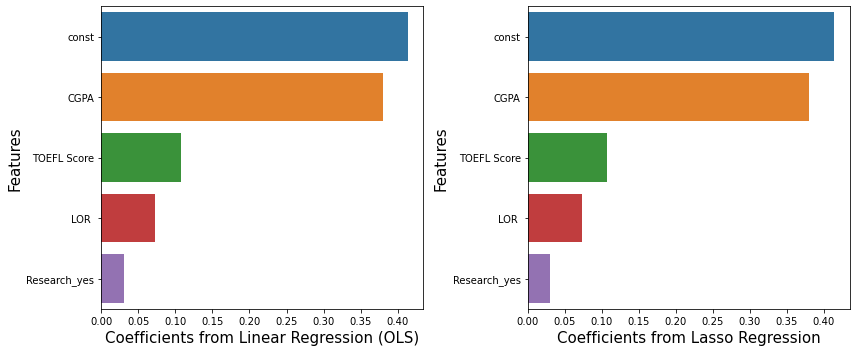

In [112]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_coefficients(linreg_model_backforward, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(lasso_regression_best, 'Lasso Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**7. Tabulate the results**

In [113]:
# update the dataframe 'score_card'
update_score_card(xtrain=X_train3,ytrain=y_train3,xtest=X_test3,ytest=y_test3,algorithm_name = 'Lasso Regression', model = lasso_regression_best, alpha = '0.0001', l1_ratio = '1')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900
1,Linear Regression with significant variables,-,-,0.790988,0.787397,0.062100,0.064500
2,Linear Regression using backward elimination,-,-,0.789969,0.786360,0.062300,0.064300
3,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
4,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
5,Ridge Regression,0.0001,0,0.789964,0.786356,0.062300,0.064200
6,Lasso Regression,0.0001,1,0.789965,0.786356,0.062300,0.064300


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are the slightly different for ridge and lasso regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Ridge_Regression'></a>
### 7.3.3 Elastic net Regression (OLS)
In statistics, fitting of linear regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. The model is trained using both L1 & L2 that allows learning of sparse model where few entries are zero similar to Lasso and also maintaining the regularization properties similar to ridge regression.

<table align="left">
    <tr>
        <td width="8%">
            <img src="read1.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we perform elastic net regression. We start with our original data set and gradually proceeding with our analysis<br><br>
                        In order to perform elastic net regression, we do the following:<br>
                        1. Fit a regression model using OLS method <br>
                        2. Use GridsearchCV to find the best penalty term<br>
                        3. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics<br>
                        4. Find the alpha for which RMSE is minimum<br>
                        5. Fit a elastic net model by substituting the alpha value obtained in step 4<br>
                        6. Compute accuracy measures <br>
                        7. Graph Representation <br>
                        8. Tabulate the results <br>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**1. Fit a regression model using OLS method**

In [114]:
# build a OLS model using OLS()
elastic_net_regression = sm.OLS(y_train3, X_train3)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

**2. Use GridsearchCV to find the best penalty term**

When the l1_ratio is set to 0 it is the same as ridge regression. When l1_ratio is set to 1 it is lasso. Elastic net is somewhere between 0 and 1 when setting the l1_ratio. Therefore, in our grid, we need to set several values of this argument. Below is the code.

In [115]:
# normalize the data which is required for elastic net
elastic = ElasticNet(normalize=True)

# use gridsearchCV to find best penalty term 
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic, 
                      param_grid={'l1_ratio':[0.0001, 0.0002, 0.001, 0.01,0.1,.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', 
                      n_jobs=1, 
                      refit=True, 
                      cv=10)

In [116]:
# fit the model to get best parameter
search.fit(X_train3, y_train3)

# get best parameter
search.best_params_

{'l1_ratio': 0.0001}

The best l1_ratio is 0.0001.

**3. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

In [117]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.0101, 0.0201 and 1.9901
for n in np.arange(0.0001, 1.5, 0.01).tolist():
    
    # fitting a elastic net regression to the elastic net model built using OLS 
    # the l1_ratio is the same as l1_wt in the below function
    # L1_wt=0.8: conducts elastic net regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                        L1_wt= 0.0001, 
                                                        alpha=n, 
                                                        start_params=results_fu.params)
     
    # obtaining the parameters of the fitted model 
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                    params=results_fr.params, 
                                    normalized_cov_params=elastic_net_regression.normalized_cov_params)
    
    # calculate rmse
    # call the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test3)
    
    # obtain the rmse
    mse_test=round(mean_squared_error(y_test3,results_fr_fit_predictions),4)
    results_fr_fit_rmse=round(np.sqrt(mse_test),4)     
  
    # compiling the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # appending the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 1.5, 0.01).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params.head()

,const,TOEFL Score,LOR,CGPA,Research_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,
0.000100,0.413237,0.109038,0.073670,0.378216,0.030675,1.151115,0.789965,0.787088,0.064000
0.010100,0.401906,0.175060,0.112909,0.267036,0.041823,1.207062,0.779757,0.776740,0.064000
0.020100,0.394578,0.184901,0.129933,0.235948,0.049827,1.263982,0.769371,0.766212,0.064800
0.030100,0.388562,0.187789,0.139772,0.219432,0.056473,1.321530,0.758871,0.755568,0.066300
0.040100,0.382885,0.188601,0.146543,0.209005,0.062190,1.382946,0.747665,0.744208,0.067800


In [118]:
# to call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,TOEFL Score,LOR,CGPA,Research_yes,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,
0.000100,0.413237,0.109038,0.073670,0.378216,0.030675,1.151115,0.789965,0.787088,0.064000
0.010100,0.401906,0.175060,0.112909,0.267036,0.041823,1.207062,0.779757,0.776740,0.064000
1.480100,0.196939,0.112503,0.112888,0.106315,0.105162,27.041849,-3.934114,-4.001705,0.303500
1.490100,0.196388,0.112203,0.112595,0.106029,0.104948,27.243058,-3.970827,-4.038921,0.304600


**4. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [119]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


We may say the model obtained by alpha = 0.0001 is performing the best.

**In elastic net regression, coefficients may be zero. This can be checked by the following code.**

In [120]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100    0
0.010100    0
0.020100    0
0.030100    0
0.040100    0
0.050100    0
0.060100    0
0.070100    0
0.080100    0
0.090100    0
0.100100    0
0.110100    0
0.120100    0
0.130100    0
0.140100    0
0.150100    0
0.160100    0
0.170100    0
0.180100    0
0.190100    0
0.200100    0
0.210100    0
0.220100    0
0.230100    0
0.240100    0
0.250100    0
0.260100    0
0.270100    0
0.280100    0
0.290100    0
0.300100    0
0.310100    0
0.320100    0
0.330100    0
0.340100    0
0.350100    0
0.360100    0
0.370100    0
0.380100    0
0.390100    0
0.400100    0
0.410100    0
0.420100    0
0.430100    0
0.440100    0
0.450100    0
0.460100    0
0.470100    0
0.480100    0
0.490100    0
0.500100    0
0.510100    0
0.520100    0
0.530100    0
0.540100    0
0.550100    0
0.560100    0
0.570100    0
0.580100    0
0.590100    0
0.600100    0
0.610100    0
0.620100    0
0.630100    0
0.640100    0
0.650100    0
0.660100    0
0.670100    0
0.680100    0
0.690100    0
0.700100    0

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Apart from the expected inference of higher RMSE for higher alphas, we can see the many of the coefficients are zero even for very small values of alpha.<br>
                    For all alpha values, the corresponding value is the number of coefficients which implies there are coefficients with value zero.
               
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Fit a elastic net model by substituting the alpha value obtained in step 4**

In [121]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                    L1_wt=0.0001, 
                                                    alpha= 0.0001, 
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     274.6
Date:                Sun, 16 May 2021   Prob (F-statistic):           1.32e-97
Time:                        19:59:40   Log-Likelihood:                 403.20
No. Observations:                 297   AIC:                            -796.4
Df Residuals:                     292   BIC:                            -777.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4132      0.011     38.045   

<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 79% of the variation in dependent variable chance of admit. The Durbin-Watson test statistics is 1.778 and indicates that there is no autocorrelation. The Condition Number is 17.9 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [122]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(elastic_net_regression_best,X_train3,y_train3))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(elastic_net_regression_best,X_test3,y_test3))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(elastic_net_regression_best,X_train3,y_train3) - get_train_rmse(elastic_net_regression_best,X_test3,y_test3))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0623
RMSE on test set:  0.0642
Difference between RMSE on train and test set:  0.001899999999999992


**7. Graphs Representation**

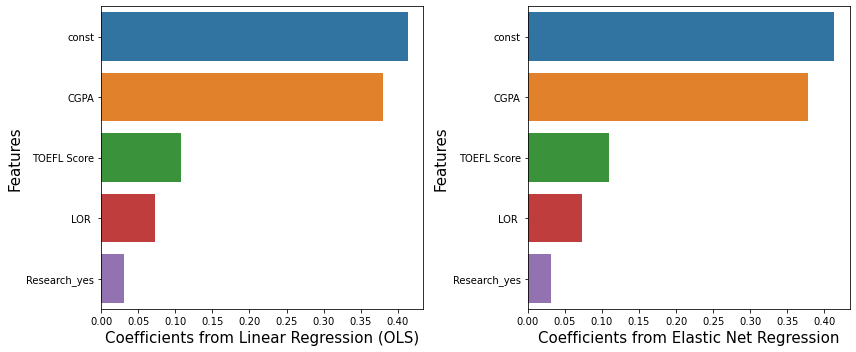

In [123]:
# subplot() is used to plot the multiple plots as a subplot
# (1,2) plots a subplot of one row and two columns
# pass the index of the plot as the third parameter of subplot()
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plot_coefficients(linreg_model_backforward, 'Linear Regression (OLS)')

# pass the index of the plot as the third parameter of subplot()
plt.subplot(1,2,2)
plot_coefficients(elastic_net_regression_best, 'Elastic Net Regression')

# to adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

**8. Tabulate the results**

In [124]:
# update the dataframe 'score_card'
update_score_card(xtrain=X_train3,ytrain=y_train3,xtest=X_test3,ytest=y_test3,algorithm_name = 'Elastic Net Regression', model = elastic_net_regression_best, alpha = '0.0001', l1_ratio = '0.0001')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900
1,Linear Regression with significant variables,-,-,0.790988,0.787397,0.062100,0.064500
2,Linear Regression using backward elimination,-,-,0.789969,0.786360,0.062300,0.064300
3,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
4,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
5,Ridge Regression,0.0001,0,0.789964,0.786356,0.062300,0.064200
6,Lasso Regression,0.0001,1,0.789965,0.786356,0.062300,0.064300
7,Elastic Net Regression,0.0001,0.0001,0.789965,0.786356,0.062300,0.064200


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are very close for the ridge, lasso, and elastic net regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='rmse_and_r-squared'></a>
## 8. Conclusion 

To take the final conclusion, let us recall the result table again

In [125]:
# view the result table
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train_RMSE,Test_RMSE
0,Linear Regression using Feature Scaling,-,-,0.784622,0.778193,0.064500,0.056900
1,Linear Regression with significant variables,-,-,0.790988,0.787397,0.062100,0.064500
2,Linear Regression using backward elimination,-,-,0.789969,0.786360,0.062300,0.064300
3,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
4,Linear Regression (using SGD),-,-,0.768092,0.755623,0.072100,0.070300
5,Ridge Regression,0.0001,0,0.789964,0.786356,0.062300,0.064200
6,Lasso Regression,0.0001,1,0.789965,0.786356,0.062300,0.064300
7,Elastic Net Regression,0.0001,0.0001,0.789965,0.786356,0.062300,0.064200


<table align="left">
    <tr>
        <td width="8%">
            <img src="solution.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> There is barely difference between the RMSE values of Elastic Net Regression model and Ridge Regression model. So, we conclude both these models are best.  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>
